# Diabetes prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Pallavi K R/Desktop/Pal/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
## Scaling if in case of range difference in the given data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)

In [11]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [12]:
## Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [13]:
## Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

C:\Users\AncSoftware\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [14]:
## Predicting the test results

y_pred = classifier.predict(x_test)

In [15]:
## Evaluation 

## Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[133  17]
 [ 31  50]]


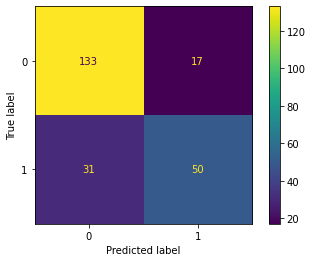

In [16]:
## for plotting Confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)

## Accuracy

In [17]:
from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.7922077922077922


## Training Accuracy

In [18]:
y_train_pred = classifier.predict(x_train)
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))

Train Accuracy:  0.776536312849162


## Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



## AUC

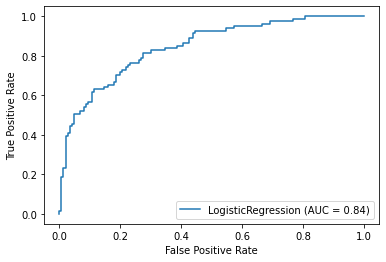

In [20]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,x_test,y_test)
plt.show()

# Decision Tree Model 

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

#### Visualise the tree

In [22]:
from sklearn import preprocessing

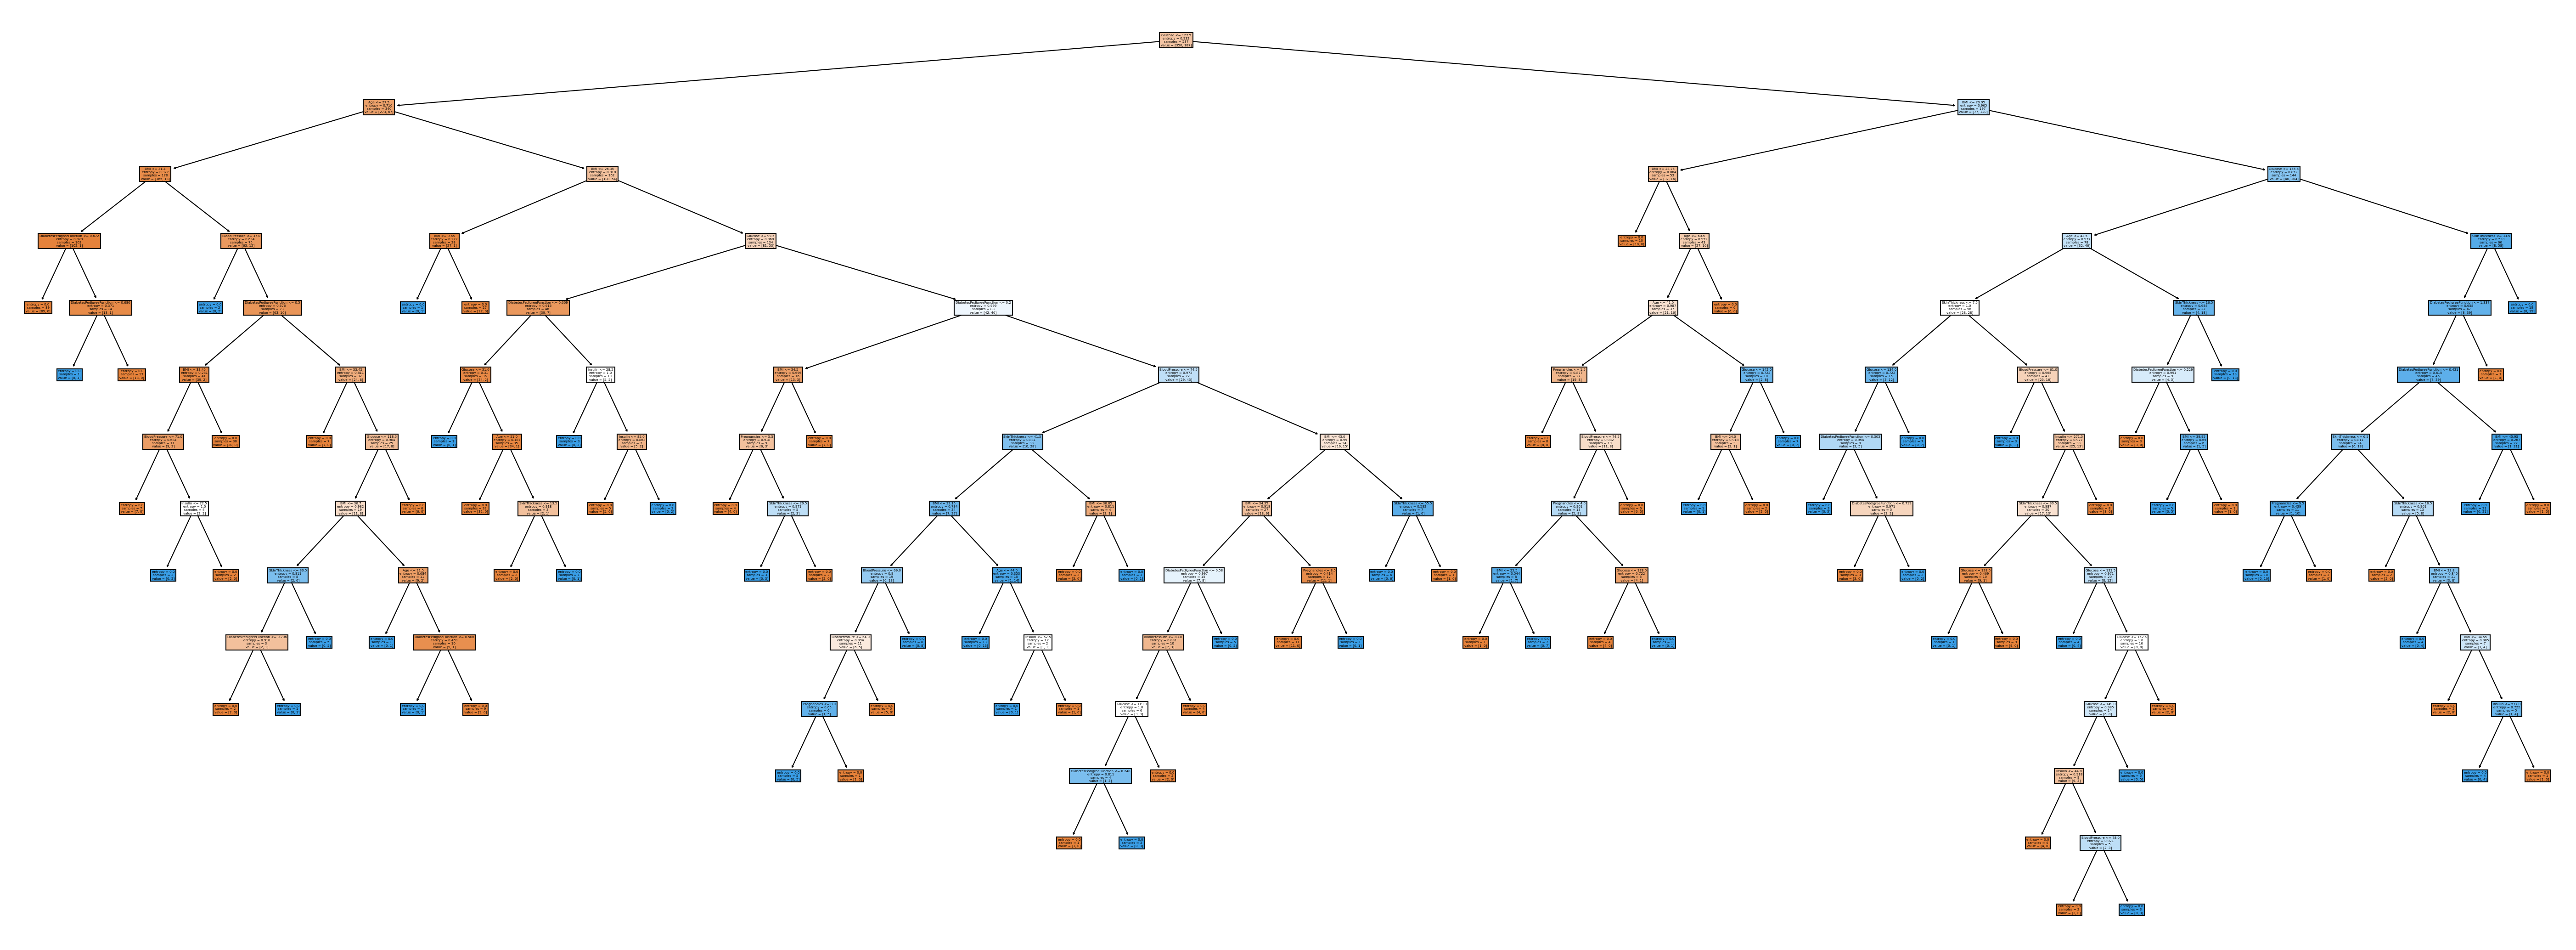

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(48,18),dpi=150)
plot_tree(classifier,filled=True,feature_names=x.columns)
plt.show()

In [24]:
## Predicting the results

y_pred = classifier.predict(x_test)

###### Evaluation

In [25]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[123  27]
 [ 25  56]]


In [26]:
## Test Accuracy

from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.7748917748917749


In [27]:
## Train Accuracy

y_train_pred = classifier.predict(x_train)
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))

Train Accuracy:  1.0


In [28]:
## Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       150
           1       0.67      0.69      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.78       231



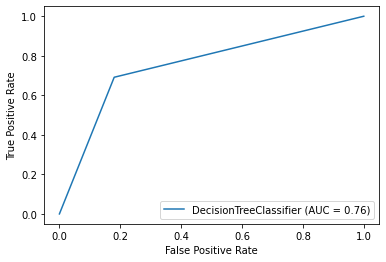

In [29]:
## AUC

from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,x_test,y_test)
plt.show()

#### As the Decision tree model gives very less accuracy and AUC values will go for Implimentiong Random Forest

# Random Forest Algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

In [31]:
## Predicting the result

y_pred = classifier.predict(x_test)

##### Evaluation

In [32]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[128  22]
 [ 37  44]]


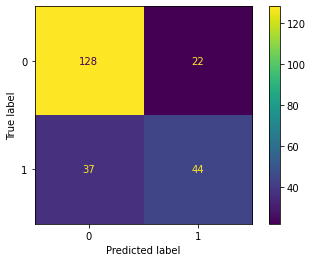

In [33]:
## for plotting Confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)

In [34]:
## Accuracy

from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.7445887445887446


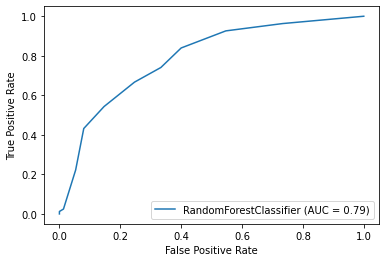

In [35]:
## AUC

from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,x_test,y_test)
plt.show()

#### Compare Random Forest Algorithm, Logistic Regression is giving better accuracy and AUC values